In [ ]:
import torch

In [ ]:
torch.__version__

'2.3.1+cu121'

In [ ]:
import numpy as np

In [ ]:
lst  = [3,4,5,6]
arr = np.array(lst)
arr.dtype

dtype('int64')

In [ ]:
tensors = torch.from_numpy(arr)     # reference
tensors1 = torch.tensor(arr)        # copy
tensors1[2] = 2000
tensors
tensors1

tensor([   3,    4, 2000,    6])

In [ ]:
a = torch.tensor([2,3,5])
b = torch.tensor([1,2,4])
a - b

tensor([1, 1, 1])

In [ ]:
a.mul(b)  # = a* b

tensor([ 2,  6, 20])

In [ ]:
a.dot(b)  # sum(a*b)

tensor(28)

In [ ]:
torch.add(a,b).sum()

tensor(17)

In [ ]:
c = torch.zeros(3)
torch.add(a, b, out = c)

tensor([3., 5., 9.])

In [ ]:
c

tensor([3., 5., 9.])

In [ ]:
x = torch.tensor([[1,4,2], [1,5,5]], dtype = torch.float)
y = torch.tensor([[5,7], [8,6], [9,11]], dtype = torch.float)
print(torch.matmul(x,y))
print(torch.mm(x,y))
print(x@y)

tensor([[55., 53.],
        [90., 92.]])
tensor([[55., 53.],
        [90., 92.]])
tensor([[55., 53.],
        [90., 92.]])


In [ ]:
x = torch.tensor(4.0, requires_grad=True)
y = x ** 2
y.backward()
x.grad

tensor(8.)

In [ ]:
lst = [[2.,3.,1.], [4.,5.,3.], [7.,6.,4.]]
torch_in = torch.tensor(lst, requires_grad=True)

In [ ]:
y = torch_in**3 + torch_in**2
y

tensor([[ 12.,  36.,   2.],
        [ 80., 150.,  36.],
        [392., 252.,  80.]], grad_fn=<AddBackward0>)

In [ ]:
z = y.sum()
z.backward()
torch_in.grad

tensor([[ 16.,  33.,   5.],
        [ 56.,  85.,  33.],
        [161., 120.,  56.]])

In [ ]:
import pandas as pd

In [ ]:
# from sklearn.datasets import load_diabetes
# diabetes = load_diabetes()
# df = pd.DataFrame(data = diabetes.data , columns = diabetes.feature_names)
# df['target'] = diabetes.target

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
import seaborn as sns

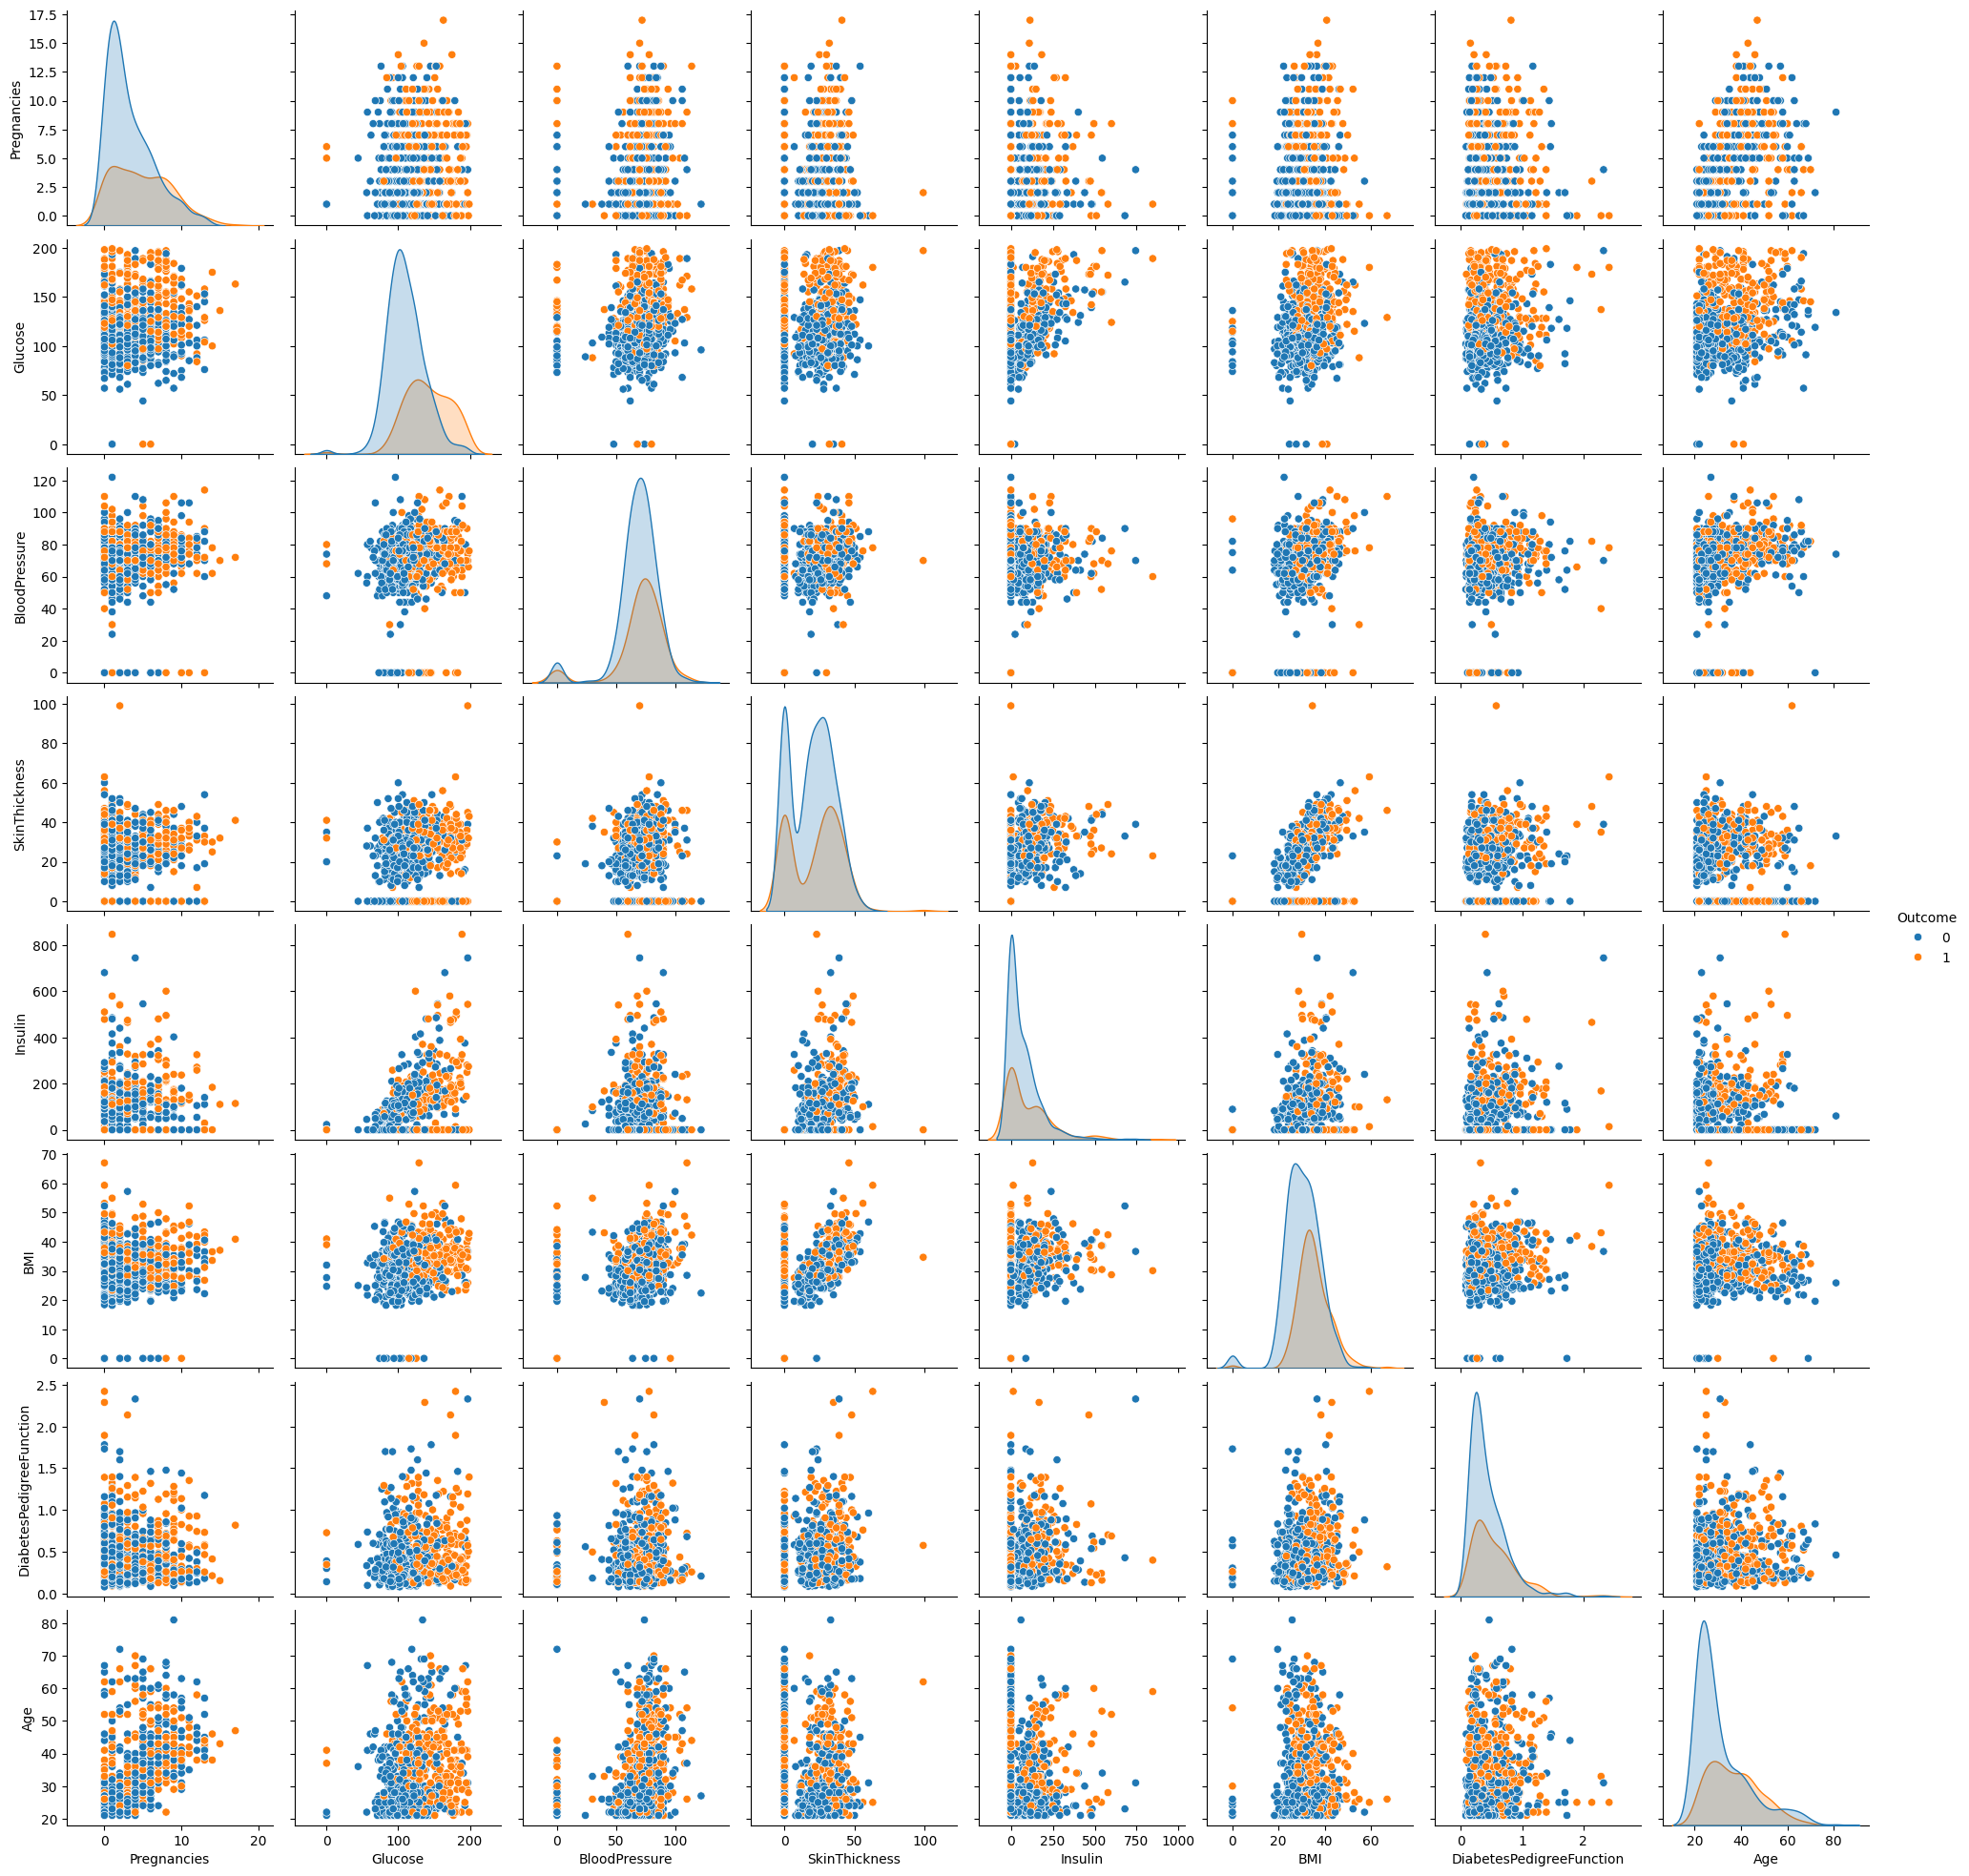

In [ ]:
sns.pairplot(df, hue = 'Outcome')

In [ ]:
df['Outcome'] = np.where(df['Outcome'] == 1, 'Diabatic', 'Non Diabatic' )

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabatic
1,1,85,66,29,0,26.6,0.351,31,Non Diabatic
2,8,183,64,0,0,23.3,0.672,32,Diabatic
3,1,89,66,23,94,28.1,0.167,21,Non Diabatic
4,0,137,40,35,168,43.1,2.288,33,Diabatic


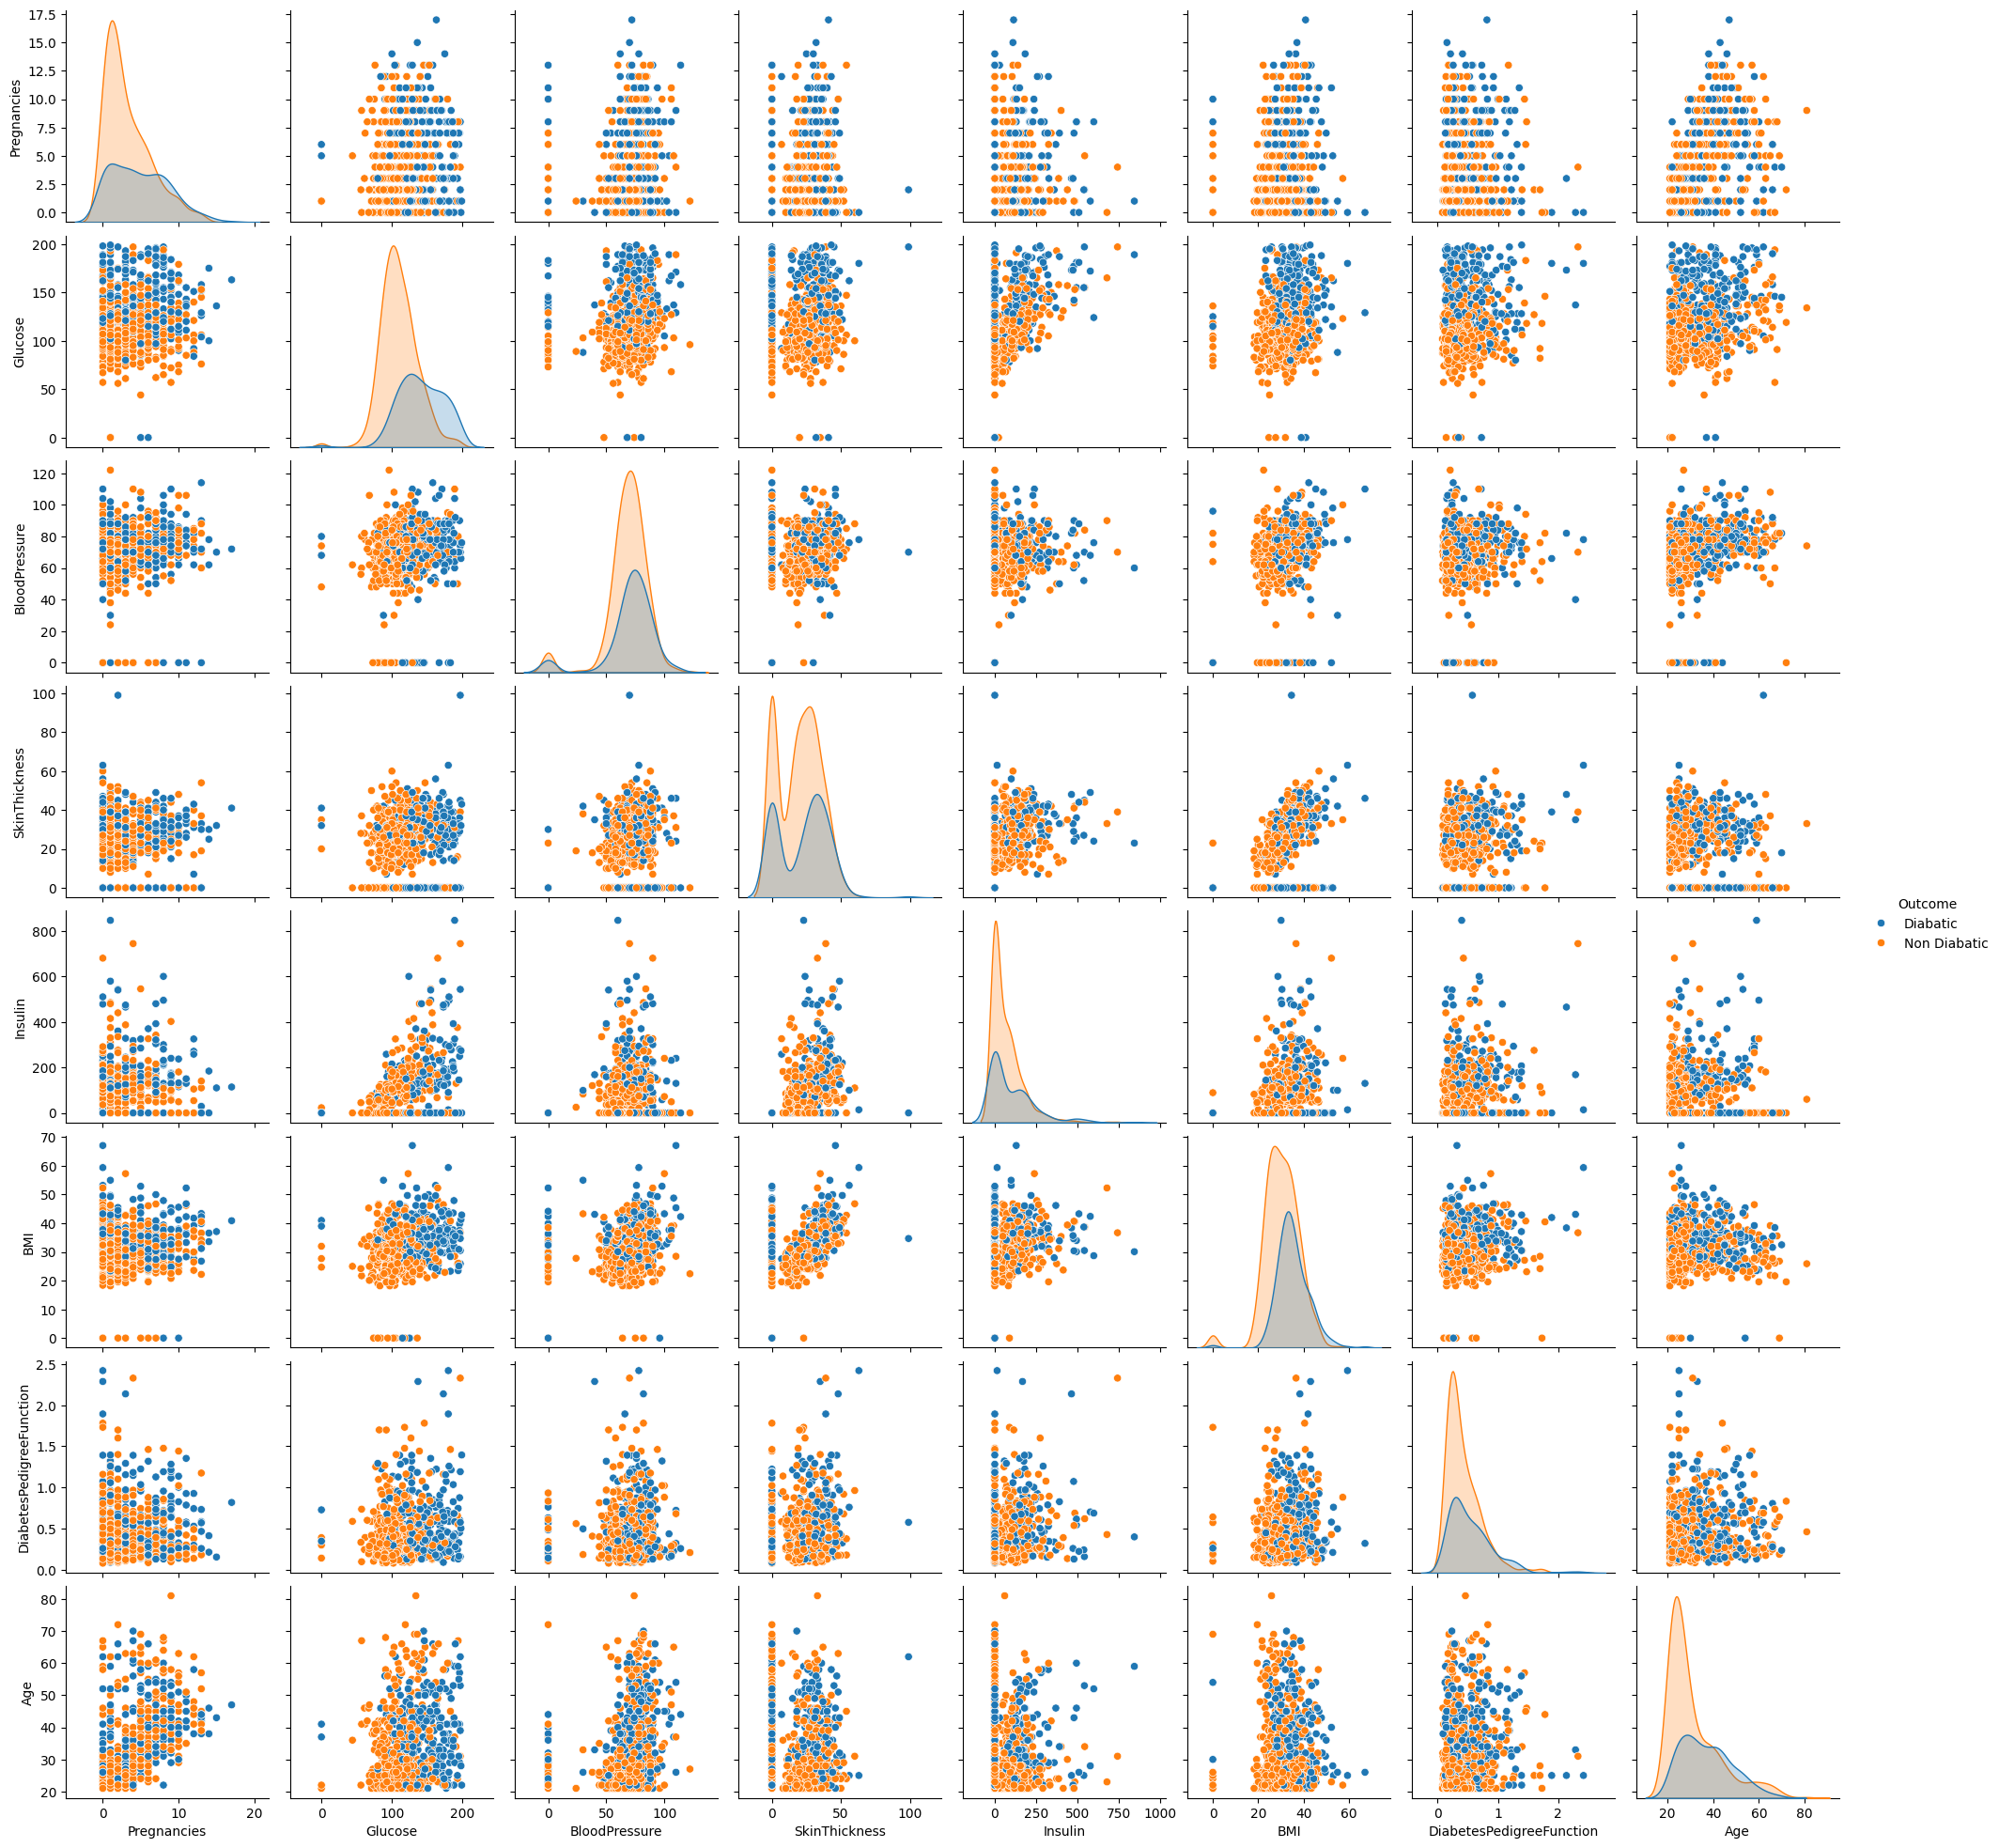

In [ ]:
sns.pairplot(df, hue = 'Outcome')

In [ ]:
X = df.drop('Outcome', axis = 1).values
y = df['Outcome'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

NameError: name 'X' is not defined

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
class ANN_Model(nn.Module):
    def __init__(self, input_features = 8, hidden1 = 20, hidden2 = 20, out_features = 2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features,  hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [ ]:
torch.manual_seed(20)
model = ANN_Model()
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [ ]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.0435, -0.2281,  0.2225, -0.1205, -0.1896,  0.2002,  0.2506, -0.2820],
        [-0.2208,  0.3048, -0.2900, -0.1304,  0.3128, -0.1742,  0.1689,  0.0285],
        [-0.0456, -0.0403,  0.0889, -0.3268,  0.1506, -0.1252,  0.3275, -0.1920],
        [-0.0361, -0.2042,  0.1300,  0.1752, -0.0264,  0.1939, -0.0806, -0.3022],
        [ 0.2642, -0.1054, -0.1217, -0.1234, -0.1839, -0.0154, -0.1907,  0.1026],
        [ 0.0369,  0.1485, -0.2521,  0.1423,  0.2064, -0.3484,  0.1894, -0.1130],
        [-0.2231, -0.2958, -0.3185,  0.0140,  0.0713,  0.1848,  0.2910,  0.2082],
        [-0.3351,  0.3172, -0.0193,  0.1992,  0.3035, -0.0423,  0.0716,  0.2527],
        [ 0.2203,  0.2263, -0.1873,  0.1679, -0.0071, -0.1656, -0.2603,  0.3361],
        [-0.1578,  0.2102,  0.1585, -0.2564, -0.0078, -0.3381, -0.0064,  0.2354],
        [-0.0180, -0.3428,  0.1465,  0.0387,  0.0399,  0.0387, -0.2971, -0.3012],
        [-0.3242,  0.2976, -0.3156, -0.2330, -0.0870,  0.0748, -0.2671, -0.2

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [ ]:
epochs = 500
final_losses = []
for i in range(epochs):
    i = i + 1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss)
    if i % 10 == 1:
        print(f"Epoch number {i} and the loss is {loss.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number 1 and the loss is 0.20936886966228485
Epoch number 11 and the loss is 0.7814324498176575
Epoch number 21 and the loss is 0.5400257706642151
Epoch number 31 and the loss is 0.4249579608440399
Epoch number 41 and the loss is 0.36307263374328613
Epoch number 51 and the loss is 0.33907350897789
Epoch number 61 and the loss is 0.31461331248283386
Epoch number 71 and the loss is 0.301302433013916
Epoch number 81 and the loss is 0.28873971104621887
Epoch number 91 and the loss is 0.28100302815437317
Epoch number 101 and the loss is 0.274068146944046
Epoch number 111 and the loss is 0.26988333463668823
Epoch number 121 and the loss is 0.2663302421569824
Epoch number 131 and the loss is 0.2712494134902954
Epoch number 141 and the loss is 0.2773612439632416
Epoch number 151 and the loss is 0.2594841718673706
Epoch number 161 and the loss is 0.2594257891178131
Epoch number 171 and the loss is 0.2537309229373932
Epoch number 181 and the loss is 0.34844261407852173
Epoch number 191 and

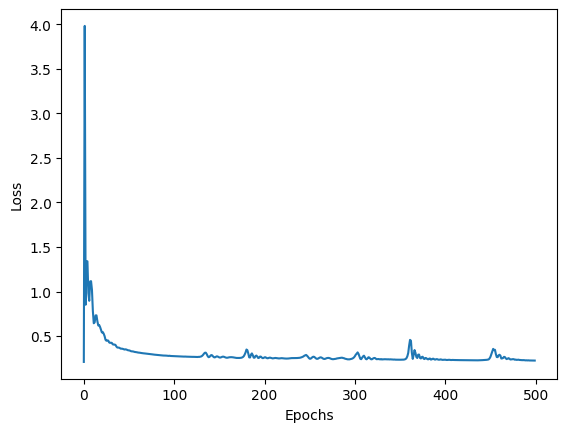

In [ ]:
import matplotlib.pyplot as plt

final_losses_np = [loss.detach().numpy() for loss in final_losses]

plt.plot(range(epochs), final_losses_np)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
predictions = []
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_pred = model(data)
    predictions.append(y_pred.argmax().item())

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, predictions)
cm

array([[83, 24],
       [15, 32]])

In [ ]:
accuracy_score(y_test, predictions)

0.7467532467532467

Text(95.72222222222221, 0.5, 'Predicted Values')

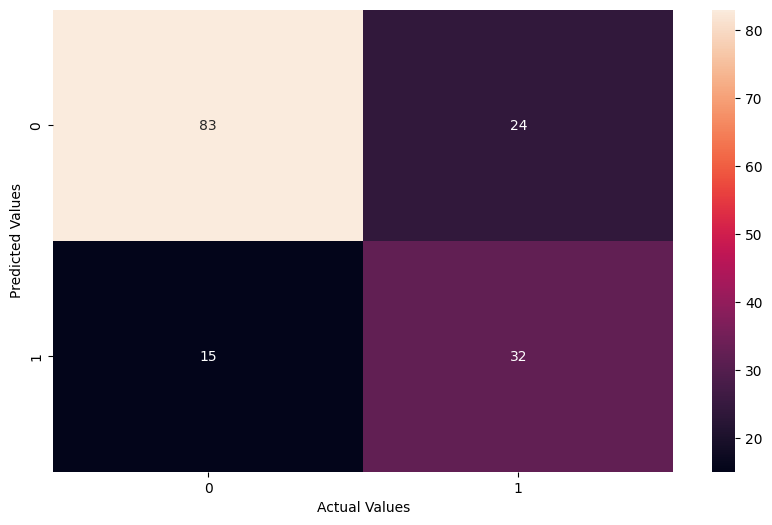

In [ ]:
plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [ ]:
torch.save(model, 'diabetes.pt')

In [ ]:
model = torch.load('diabetes.pt')
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [ ]:
df.iloc[0, :-1].tolist()

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [ ]:
lst1 = [6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]
dd = torch.tensor(lst1)

In [ ]:
with torch.no_grad():
  print(model(dd).argmax().item())

1


In [ ]:
import numpy as np
def gram_schmidt(arr):
  r, c = arr.shape
  Q = np.zeros((r, c))
  Q[0] = arr[0] / np.linalg.norm(arr[0])
  for i in range(1, r):
      Q[i] = arr[i]
      for j in range(i):
          Q[i] -= (np.inner(Q[j], arr[i])/ np.inner(Q[j], Q[j])) * Q[j]
      Q[i] = Q[i] / np.linalg.norm(Q[i])
  return Q.T
V = np.array([[1, 1, 5], [2, 0, 2], [-2, 4, 0]])
A = np.array([[-1, 3],[1, 5]])
gram_schmidt(A.T)

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [ ]:
def gram_schmidt(arr):
  Q, R = np.linalg.qr(arr)
  return Q
V = np.array([[1, 1, 5], [2, 0, 2], [-2, 4, 0]])
A = np.array([[-1, 3],[1, 5]])
gram_schmidt(A)
#gram_schmidt(V)

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [ ]:
x2 = np.array([1, 0, -4])
v = np.array([1, 2, -2])
v_n = np.linalg.norm(x2)
v2 = x2 - (np.inner(x2, v) / np.inner(v, v)) * v
v2 / np.linalg.norm(v2)

array([ 0.        , -0.70710678, -0.70710678])

In [ ]:
np.inner(x2, v)

9

In [ ]:
def dot_pdt(v1, v2):
  if len(v1)!= len(v2):
    raise ValueError
  return sum(v1_i * v2_i for v1_i, v2_i in zip(v1, v2))

x2 = np.array([1, 0, -4])
v = np.array([1, 2, -2])
dot_pdt(x2, v)

9

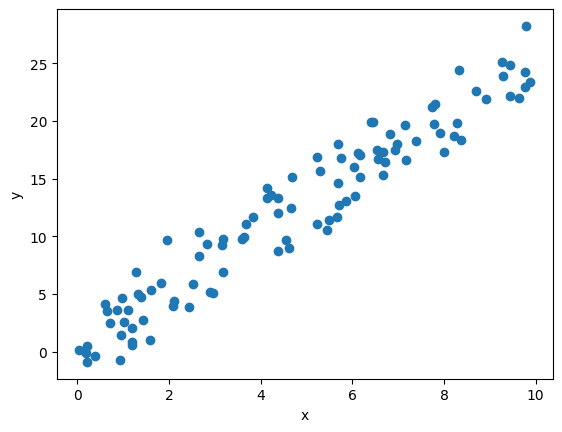

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data points
np.random.seed(0)
x = np.random.rand(100) * 10  # 100 random points between 0 and 10
y = 2.5 * x + np.random.randn(100) * 2  # y = 2.5x + noise

# Scatter plot of the data
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [24]:
# Add intercept to design matrix
X = np.vstack([np.ones_like(x), x]).T  # Intercept and slope

# Response vector
y = y[:, np.newaxis]

In [ ]:
# Least squares estimate: beta = (X^TX)^(-1) X^T y
beta = np.linalg.inv(X.T @ X) @ (X.T @ y)

print("Estimated coefficients:")
print(f"Intercept (beta_0): {beta[0][0]}")
print(f"Slope (beta_1): {beta[1][0]}")

Estimated coefficients:
Intercept (beta_0): 0.44430215489445984
Slope (beta_1): 2.4873870042804076


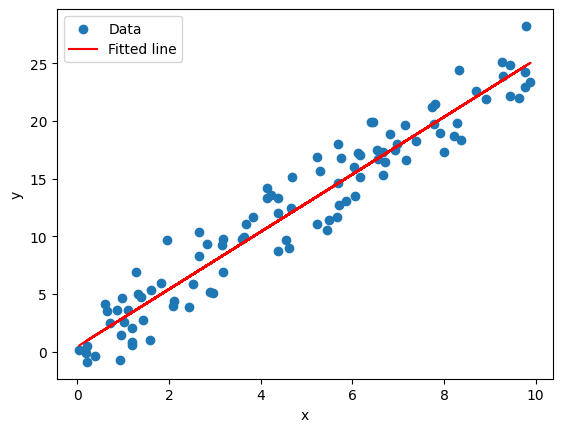

In [ ]:
# Predicted y values based on the estimated coefficients
y_pred = X @ beta

# Plot the data and the fitted line
plt.scatter(x, y, label="Data")
plt.plot(x, y_pred, color="red", label="Fitted line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm

# Add a constant (intercept term)
X_sm = sm.add_constant(x)

# Fit the model
model = sm.OLS(y, X_sm).fit()

# Print summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1270.
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           6.76e-58
Time:                        14:37:47   Log-Likelihood:                -210.83
No. Observations:                 100   AIC:                             425.7
Df Residuals:                      98   BIC:                             430.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4443      0.387      1.149      0.2

In [34]:
a = np.arange(1,10).reshape(3,3)
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [47]:
for row in a.T:
  for ele in row:
    print(ele, end = " ")

1 4 7 2 5 8 3 6 9 

In [46]:
for ele in np.nditer(a, order = 'F'):
  print(ele, end = " ")

1 4 7 2 5 8 3 6 9 

In [52]:
import numpy as np
import numpy.ma as ma
arr = np.array([0.3,0.1,np.nan,0.3,np.inf,0.5])
masked = arr[~np.isnan(arr)]
masked = masked[~np.isinf(masked)]
masked

array([0.3, 0.1, 0.3, 0.5])

In [53]:
arr = np.array([0.3,0.1,np.nan,0.3,np.inf,0.5])
ma.masked_invalid(arr)

masked_array(data=[0.3, 0.1, --, 0.3, --, 0.5],
             mask=[False, False,  True, False,  True, False],
       fill_value=1e+20)

In [61]:
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
def sq(x):
  if x % 2 == 0:
    return x ** 2
  else:
    return x

In [62]:
sq(arr)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [63]:
vec = np.vectorize(sq)
vec(arr)

array([[ 1,  4,  3],
       [16,  5, 36],
       [ 7, 64,  9]])